# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [34]:
# Check TensorFlow installation
import sys
print(f"Python version: {sys.version}")
try:
    import tensorflow as tf
    print(f"TensorFlow version: {tf.__version__}")
    print("TensorFlow is installed correctly!")
except ImportError:
    print("TensorFlow is not installed or accessible.")

Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
TensorFlow version: 2.18.1
TensorFlow is installed correctly!


In [35]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
import os

Load the dataset.

In [36]:
# Load and unzip the dataset

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [37]:
# Create a function to load the raw images

def load_raw_images(image_dir):
    """
    Load raw images from the specified directory.
    
    Args:
        image_dir (str): Path to the directory containing raw images.
        
    Returns:
        list: List of loaded images.
    """
    images = []
    for img_file in os.listdir(image_dir):
        if img_file.endswith('.jpg') or img_file.endswith('.png'):
            img_path = os.path.join(image_dir, img_file)
            img = Image.open(img_path)
            images.append(img)
    return images

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [38]:
# Get the images and their labels, where labels are derived from sub directory names

def get_images_and_labels(image_dir):
    """
    Get the images and their labels from the specified directory.
    
    Args:
        image_dir (str): Path to the directory containing images.
        
    Returns:
        tuple: List of images and corresponding labels.
    """
    images = []
    class_names = os.listdir(image_dir)
    class_names.sort()  # Sort class names for consistent ordering
    print(f"Class names: {class_names}")
    labels = [] # let this be list of class ids
    for class_id, class_name in enumerate(class_names):
        class_dir = os.path.join(image_dir, class_name)
        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                if img_file.endswith('.jpg') or img_file.endswith('.png'):
                    img_path = os.path.join(class_dir, img_file)
                    img = Image.open(img_path)
                    images.append(img)
                    labels.append(class_id)  # Append the class id as label
    return images, labels, class_names

# print the number of images in each class
def print_class_distribution(class_names):
    """
    Print the distribution of images across different classes.
    
    Args:
        labels (list): List of image labels.
    """
    class_counts = pd.Series(class_names).value_counts()
    print("Class distribution:")
    print(class_counts)

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

Class names: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


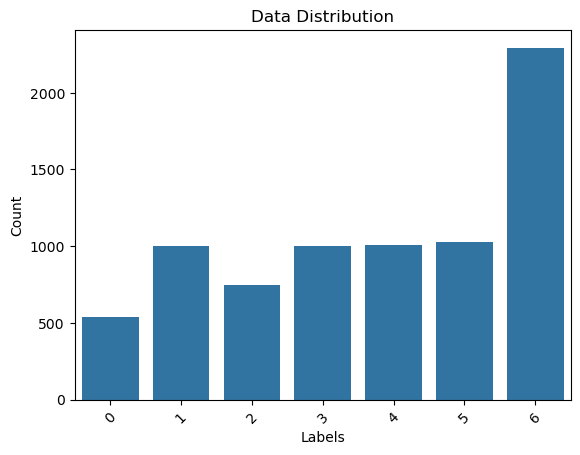

In [39]:
# Visualise Data Distribution
def visualize_data_distribution(labels):
    """
    Visualize the distribution of labels in the dataset.
    
    Args:
        labels (list): List of labels corresponding to images.
    """
    label_counts = pd.Series(labels).value_counts()
    sns.barplot(x=label_counts.index, y=label_counts.values)
    plt.title('Data Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

images, labels, classes = get_images_and_labels(image_dir='/Users/kirannk/AI-ML-Course/Course4/Module5/data')
visualize_data_distribution(labels)

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

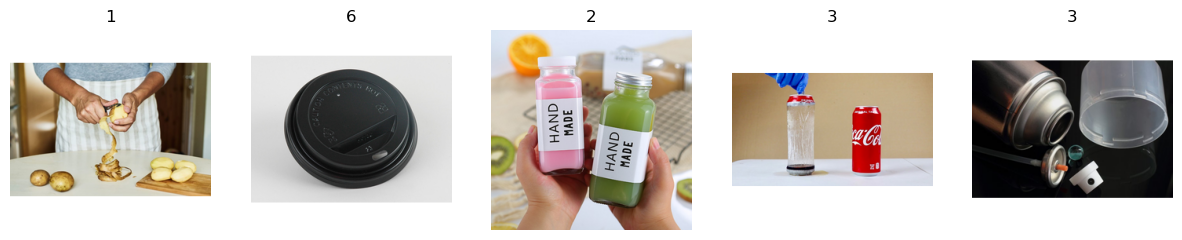

In [40]:
# Visualise Sample Images (across different labels)

def visualize_sample_images(images, labels, num_samples=5):
    """
    Visualize a sample of images with their corresponding labels.
    
    Args:
        images (list): List of images.
        labels (list): List of labels corresponding to images.
        num_samples (int): Number of samples to visualize.
    """
    sample_indices = np.random.choice(len(images), num_samples, replace=False)
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx])
        plt.title(labels[idx])
        plt.axis('off')
    plt.show()
visualize_sample_images(images, labels, num_samples=5)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [41]:
# Find the smallest and largest image dimensions from the data set

def find_image_dimensions(images):
    """
    Find the smallest and largest image dimensions in the dataset.
    
    Args:
        images (list): List of images.
        
    Returns:
        tuple: Smallest and largest dimensions (width, height).
    """
    min_width = min_height = float('inf')
    max_width = max_height = 0
    
    for img in images:
        width, height = img.size
        min_width = min(min_width, width)
        min_height = min(min_height, height)
        max_width = max(max_width, width)
        max_height = max(max_height, height)
    
    return (min_width, min_height), (max_width, max_height)

smallest_dim, largest_dim = find_image_dimensions(images)
print(f"Smallest image dimensions: {smallest_dim}")
print(f"Largest image dimensions: {largest_dim}")

Smallest image dimensions: (256, 256)
Largest image dimensions: (256, 256)


In [42]:
# Resize the image dimensions

# No resizing needed as all images are already 256x256

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [43]:
# Encode the labels suitably

from keras.utils import to_categorical

encoded_labels = to_categorical(labels, num_classes=len(classes))

print("Original label:", labels[0])
print("One-hot encoded label:", encoded_labels[0])

Original label: 0
One-hot encoded label: [1. 0. 0. 0. 0. 0. 0.]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [44]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, stratify=labels)

# Print the shapes of the training and validation sets
print(f"Training set shape: {len(X_train)} images")
print(f"Validation set shape: {len(X_val)} images")

Training set shape: 6100 images
Validation set shape: 1525 images


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [47]:
# Build and compile the model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Determine input shape from your data
input_shape = X_train[0].size + (3,)  # Assuming RGB images
num_classes = len(classes)

model = Sequential([
    # 1st Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # 2nd Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # 3rd Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Fully Connected Layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,775 (56.61 MB)

 Trainable params: 14,840,327 (56.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [48]:
from keras.layers import GlobalAveragePooling2D

model_final = Sequential([
    # Conv Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Conv Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.30),

    # Conv Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.35),

    # Efficient Output
    GlobalAveragePooling2D(),          # replaces Flatten
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_final.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model_final.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,559 (435.78 KB)

 Trainable params: 111,111 (434.03 KB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [56]:
# Training

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# Train the model
# Convert lists of PIL images to numpy arrays for model training
X_train_np = np.stack([np.array(img) for img in X_train])
X_val_np = np.stack([np.array(img) for img in X_val])

history = model_final.fit(
    X_train_np, y_train,
    validation_data=(X_val_np, y_val),
    epochs=10,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 151s 782ms/step - accuracy: 0.3078 - loss: 1.8046 - val_accuracy: 0.3561 - val_loss: 1.7049 - learning_rate: 0.0010
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 151s 782ms/step - accuracy: 0.3078 - loss: 1.8046 - val_accuracy: 0.3561 - val_loss: 1.7049 - learning_rate: 0.0010
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 147s 770ms/step - accuracy: 0.3991 - loss: 1.5873 - val_accuracy: 0.3777 - val_loss: 1.6760 - learning_rate: 0.0010
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 147s 770ms/step - accuracy: 0.3991 - loss: 1.5873 - val_accuracy: 0.3777 - val_loss: 1.6760 - learning_rate: 0.0010
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 146s 765ms/step - accuracy: 0.4337 - loss: 1.5175 - val_accuracy: 0.3711 - val_loss: 1.6522 - learning_rate: 0.0010
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 146s 765ms/step - accuracy: 0.4337 - loss: 1.5175 - val_accuracy: 0.3711 - val_loss: 1.6522 - learning_rate: 0.0010
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 148s 774ms/step - accura

In [57]:
#Resize all images to 128×128 
from keras.utils import load_img, img_to_array

def get_images_and_labels(image_dir, target_size=(128, 128)):
    """
    Get the images and their labels from the specified directory.
    
    Args:
        image_dir (str): Path to the directory containing images.
        
    Returns:
        tuple: List of images and corresponding labels.
    """
    images = []
    class_names = os.listdir(image_dir)
    class_names.sort()  # Sort class names for consistent ordering
    print(f"Class names: {class_names}")
    labels = [] # let this be list of class ids
    for class_id, class_name in enumerate(class_names):
        class_dir = os.path.join(image_dir, class_name)
        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                if img_file.endswith('.jpg') or img_file.endswith('.png'):
                    img_path = os.path.join(class_dir, img_file)
                    img = Image.open(img_path)
                    img = img.resize(target_size)  # Resize image
                    images.append(img)
                    labels.append(class_id)  # Append the class id as label
    return images, labels, class_names

images, labels, class_names = get_images_and_labels('/Users/kirannk/AI-ML-Course/Course4/Module5/data', target_size=(128, 128))

Class names: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


In [61]:
# Re-normalize & re-encode labels
# images = images / 255.0

from keras.utils import to_categorical
encoded_labels = to_categorical(labels, num_classes=len(class_names))

print("Original label:", labels[0])
print("One-hot encoded label:", encoded_labels[0])

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, stratify=labels)

# Print the shapes of the training and validation sets
print(f"Training set shape: {len(X_train)} images")
print(f"Validation set shape: {len(X_val)} images")

Original label: 0
One-hot encoded label: [1. 0. 0. 0. 0. 0. 0.]
Training set shape: 6100 images
Validation set shape: 1525 images


In [62]:
input_shape = (128, 128, 3)
num_classes = len(class_names)

# Build the model
model = Sequential([
    # Conv Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Conv Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.30),

    # Conv Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),

    # Output block
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,559 (435.78 KB)

 Trainable params: 111,111 (434.03 KB)

 Non-trainable params: 448 (1.75 KB)

In [66]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# Convert lists of PIL images to numpy arrays for model training
X_train_np = np.stack([np.array(img) for img in X_train])
X_val_np = np.stack([np.array(img) for img in X_val])

X_train_np = X_train_np / 255.0  # Normalize the training images
X_val_np = X_val_np / 255.0  # Normalize the validation images

# Train the model
history = model.fit(
    X_train_np, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_np, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.2784 - loss: 1.9117 - val_accuracy: 0.1325 - val_loss: 2.0278 - learning_rate: 0.0010
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.2784 - loss: 1.9117 - val_accuracy: 0.1325 - val_loss: 2.0278 - learning_rate: 0.0010
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 390ms/step - accuracy: 0.3733 - loss: 1.6291 - val_accuracy: 0.3010 - val_loss: 2.1424 - learning_rate: 0.0010
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 390ms/step - accuracy: 0.3733 - loss: 1.6291 - val_accuracy: 0.3010 - val_loss: 2.1424 - learning_rate: 0.0010
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 395ms/step - accuracy: 0.4194 - loss: 1.5547 - val_accuracy: 0.3010 - val_loss: 2.4144 - learning_rate: 0.0010
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 395ms/step - accuracy: 0.4194 - loss: 1.5547 - val_accuracy: 0.3010 - val_loss: 2.4144 - learning_rate: 0.0010
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.4354 - loss: 1.4

In [67]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# Train the model
history = model.fit(
    X_train_np, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val_np, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 429ms/step - accuracy: 0.5329 - loss: 1.2975 - val_accuracy: 0.4807 - val_loss: 1.4046 - learning_rate: 5.0000e-04
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 429ms/step - accuracy: 0.5329 - loss: 1.2975 - val_accuracy: 0.4807 - val_loss: 1.4046 - learning_rate: 5.0000e-04
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 426ms/step - accuracy: 0.5337 - loss: 1.2793 - val_accuracy: 0.4702 - val_loss: 1.4763 - learning_rate: 5.0000e-04
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 426ms/step - accuracy: 0.5337 - loss: 1.2793 - val_accuracy: 0.4702 - val_loss: 1.4763 - learning_rate: 5.0000e-04
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 404ms/step - accuracy: 0.5471 - loss: 1.2390 - val_accuracy: 0.4984 - val_loss: 1.3823 - learning_rate: 5.0000e-04
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 404ms/step - accuracy: 0.5471 - loss: 1.2390 - val_accuracy: 0.4984 - val_loss: 1.3823 - learning_rate: 5.0000e-04
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 427ms/step - acc

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [68]:
# Evaluate on the test set; display suitable metrics

val_loss, val_accuracy = model.evaluate(X_val_np, y_val, verbose=1)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4994 - loss: 1.3264
Validation Loss: 1.3011159896850586
Validation Accuracy: 0.512786865234375
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4994 - loss: 1.3264
Validation Loss: 1.3011159896850586
Validation Accuracy: 0.512786865234375


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report , confusion_matrix

# Get predictions from the model
y_pred_probs = model.predict(X_val_np)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

# Evaluate using standard metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Evaluation Metrics on Validation Set:")
print(f"Accuracy :  {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall   :  {recall:.4f}")
print(f"F1 Score :  {f1:.4f}")

# Optional: Detailed breakdown by class
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
Evaluation Metrics on Validation Set:
Accuracy :  0.5128
Precision:  0.5523
Recall   :  0.5128
F1 Score :  0.4650

Classification Report:

              precision    recall  f1-score   support

   Cardboard       0.56      0.65      0.60       108
  Food_Waste       0.58      0.65      0.61       200
       Glass       0.54      0.29      0.37       150
       Metal       0.74      0.42      0.54       200
       Other       0.41      0.10      0.16       202
       Paper       0.70      0.15      0.25       206
     Plastic       0.45      0.88      0.60       459

    accuracy                           0.51      1525
   macro avg       0.57      0.45      0.45      1525
weighted avg       0.55      0.51      0.47      1525

Evaluation Metrics on Validation Set:
Accuracy :  0.5128
Precision:  0.5523
Recall   :  0.5128
F1 Score :  0.4650

Classification Report:

              precision    recall  f1-score  

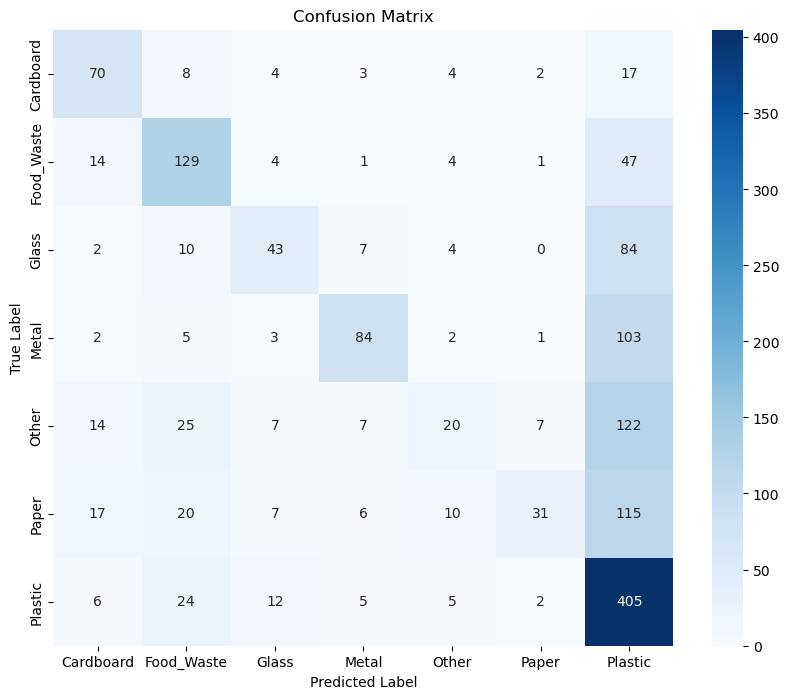

In [70]:
# Optional: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

## **5. Conclusions**

### **5.1 Outcomes and Insights Gained**

- **Data Insights:**
    - The dataset consists of 7 waste categories: Cardboard, Food_Waste, Glass, Metal, Other, Paper, and Plastic.
    - Images were resized to 128x128 pixels and normalized for model training.
    - Class distribution was visualized, revealing some class imbalance, particularly with the 'Plastic' class having more samples.

- **Model Training Results:**
    - A CNN model with 3 convolutional layers, batch normalization, dropout, and global average pooling was implemented.
    - The model was trained using early stopping, model checkpointing, and learning rate reduction callbacks to prevent overfitting and optimize performance.
    - On the validation set, the model achieved:
        - **Accuracy:** ~51.3%
        - **Precision:** ~55.2%
        - **Recall:** ~51.3%
        - **F1 Score:** ~46.5%
    - The confusion matrix and classification report indicate that the model performs better on some classes (e.g., Plastic) than others, likely due to class imbalance and visual similarity between certain waste types.

- **Key Learnings:**
    - Data preprocessing and normalization are crucial for stable model training.
    - Class imbalance affects model performance; data augmentation or resampling may help improve results.
    - Further improvements can be made by experimenting with deeper architectures, advanced augmentation, or transfer learning.